In [1]:
%matplotlib inline 
import numpy as np                       
from matplotlib import pyplot as plt      
import time, sys                   

### Постановка и сеточные параметры

Рассмотрим задачу об эволюции ступеньки. Численное решается уравнение переноса с коэффициентом переноса $c$.

In [100]:
nx = 41  # количество узлов по пространству
dx = 2 / (nx-1) # шаг по пространству
nt = 25    # количество узлов по времени
dt = .025  # шаг по времени
T = dt*(nt-1)
c = 1      # скорость распространения возмущения (коэффициент переноса)
x_mesh = np.linspace(0, 2, nx) #сетка по пространству
r = c*dt/dx # число Куранта
print('r = ', r)
print('T = ', T)

r =  0.5
T =  0.6000000000000001


#### Начальные условия

Зададим $u(x, 0) = 2$ при $x \in [0.5, 1]$ и $u(x, 0) = 1$ иначе во всей расчетной области. Такая функция называется "ступенька". 

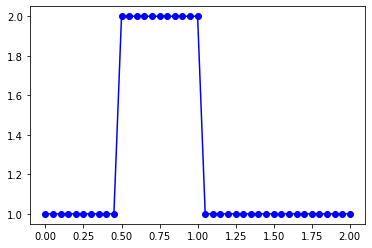

In [101]:
u_init = np.ones(nx)      
u_init[int(.5 / dx):int(1 / dx + 1)] = 2  
plt.plot(x_mesh, u_init, '-bo')

#### Точное решение

К моменту времени T ступенька просто сдвинется вправо

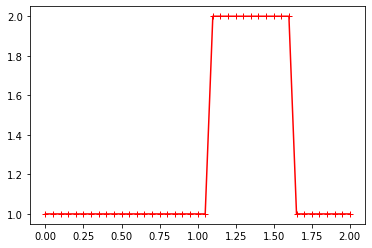

In [102]:
u_exact = np.ones(nx)      
u_exact[int((.5+c*T) / dx):int((1+c*T) / dx + 1)] = 2  
plt.plot(x_mesh, u_exact, '-r+')

### Численное решение

#### Часть 1. Явный левый уголок
Сначала примените схему Явный левый уголок (Upwind scheme). Провести расчеты для $nx = 41; 81; 121$. Построить графики решения

In [103]:
def Upwind_scheme_graph(nx):
    dx = 2 / (nx-1) # шаг по пространству
    nt = 25    # количество узлов по времени
    dt = .025  # шаг по времени
    T = dt*(nt-1)
    c = 1      # скорость распространения возмущения (коэффициент переноса)
    x_mesh = np.linspace(0, 2, nx) #сетка по пространству
    r = c*dt/dx # число Куранта
    #print('r = ', r)
    #print('T = ', T)
    u_init = np.ones(nx)      
    u_init[int(.5 / dx):int(1 / dx + 1)] = 2  
    u_exact = np.ones(nx)      
    u_exact[int((.5+c*T) / dx):int((1+c*T) / dx + 1)] = 2
    
    un = np.ones(nx) # инициализация вспомогательного массива для хранения
                 # данных с предыдущего шага
    u = u_init.copy()
    for n in range(1, nt):  # шагаем по времени
        un = u.copy() # заполняем данными с предыдущего шага
        for i in range(1, nx): # шагаем по пространству
            u[i] = un[i] - r*(un[i] - un[i-1])
 
    plt.figure(figsize = (10, 7))
    plt.plot(x_mesh, u, '-bo', label = 'Numeric nx = ' + str(nx))
    plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
    plt.legend()
    plt.show()

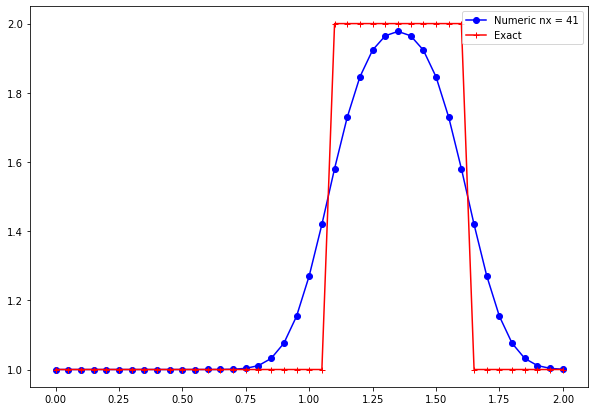

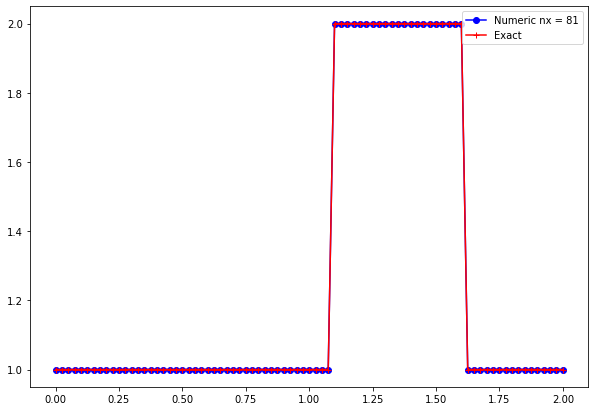

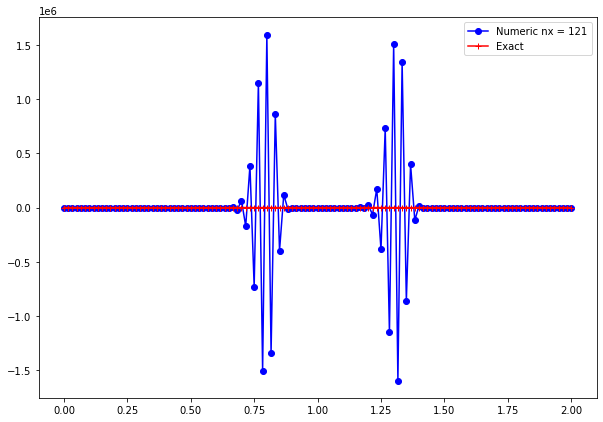

In [104]:
for nx in [41,81,121]:   
    Upwind_scheme_graph(nx)

1. Какой у схемы порядок аппроксимации?

##################(Answer)##################

Порядок аппроксимации находим через невязку разностной схемы:
$$r_l^n = \frac{u_l^{n+1} - u_{l}^{n}}{\tau} + с\cdot\frac{u_{l}^{n} - u_{l-1}^{n}}{h}$$
Раскладываем по Tейлору с учётом, что:  
$$u_l^{n+1} = u(x,t + \tau),\;\; u_{l-1}^n = u(x - h, t)$$ 
$$u_{t} + cu_{x} = 0$$ 
(Аналогичную работу проделывали на семинаре)

Получаем:
$$r_l^n = u_{tt}\frac{\tau}{2} - cu_{xx}\frac{h}{2} + \ldots$$
Видим, порядок аппроксимации по времени и по пространству = 1.

2. Удалось ли получить решение? Почему?

##################(Answer)##################

Метод "Левый уголок" - условно устойчив. Его область устойчивости $\tau \leq h$. В нашем случае $\tau = 0.025,\;\;\; h = 0.05,\; 0.025,\; 0.017$ (для первого, второго и третьего случаев соответственно). Это и наблюдаем на графиках - изначально решение сходиться к настоящему. Далее совпадает ($\tau = h$). А после, мы уже не попадаем в область устойчивости $\rightarrow$ метод не будет сходиться.

3. Сколько граничных условий и где нужно поставить в этой задаче?

##################(Answer)##################

Необходимо поставить одно граничное условие слева (т.к. $c \geq 0$).

4. Почему в задаче явно нигде не инициализируются граничные условия?

##################(Answer)##################

Мы неявно инициализируем граничные условия, предполагая что слева они равны нулю . Далее т.к. мы движемся не с 0 а с 1 узла, "наше" граничное условие сохраняется на каждом шаге.

5. Почему в цикле по пространству индексация с 1?

##################(Answer)##################

Это особенность схемы. Для вычисления значения по координате нам необходимо значть значение предыдущего элемента.

6. Можно ли решить задачу схемой Явный правый уголок?

##################(Answer)##################

Нет нельзя, т.к. коэффициент переноса в данной задаче > 0, для положительного $c$ "Явный правый уголок" не будет устойчив для любого разбиения.

7. Почему при решении на 41 узле решение размывается, а на 81 узле нет?

##################(Answer)##################

При решении на 81 узлах, $r = 1$ нет разницы между групповой скоростью точного решения и приближённого решения, решение не размывается. Напротив при решении на 41 узлах происходит размывание решения вследствие того, что гармоники разных длин волн будут распространяться с разными скоростями (из полезной книги [1], с.73).

8. Объясните причину размытия решения. (Уже ответил в вопросе №7)

Для ответа на шестой вопрос может быть полезна книга [1], c.71

1. Зализняк В.Е. Основы вычислительной физики. Часть 1. Введение в конечно-разностные методы

#### Часть 2. Схема МакКормака 

Теперь примените схему МакКормака (MacCormack method). Провести расчеты для $nx = 41; 81; 121$. Построить графики решения

In [105]:
def MacCormack_graph(nx):
    dx = 2 / (nx-1) # шаг по пространству
    nt = 25    # количество узлов по времени
    dt = .025  # шаг по времени
    T = dt*(nt-1)
    c = 1      # скорость распространения возмущения (коэффициент переноса)
    x_mesh = np.linspace(0, 2, nx) #сетка по пространству
    r = c*dt/dx # число Куранта
    #print('r = ', r)
    #print('T = ', T)
    u_init = np.ones(nx)  # Делаем размер на 1 больше т.к. теперь есть шаг по пространству вперёд    
    u_init[int(.5 / dx):int(1 / dx + 1)] = 2  
    u_exact = np.ones(nx)      
    u_exact[int((.5+c*T) / dx):int((1+c*T) / dx + 1)] = 2
    
    un = np.ones(nx) # инициализация вспомогательного массива для хранения
                 # данных с предыдущего шага
    u_pred = np.ones(nx)
    u = u_init.copy()
    # Всё тоже, что и для предыдущего задания, далее идёт блок TODO
    for n in range(1, nt):  
        un = u.copy() 
        # TODO: predictor
        for i in range(nx-1): # шагаем по пространству, меньше размер т.к. теперь нужно знать U(l+1)
            u_pred[i] = un[i] - r*(un[i+1] - un[i]) # шаг предиктора (u с чертой)
        # TODO: corrector
        for i in range(1,nx): # шагаем по пространству, на один меньше т.к. шаг начинаем не с 0 (по аналогии левого уголка)
            u[i] = (un[i]+u_pred[i])/2 - r/2*(u_pred[i] - u_pred[i-1]) # шаг корректора

 
    plt.figure(figsize = (10, 7))
    plt.plot(x_mesh, u, '-bo', label = 'Numeric nx = ' + str(nx))
    plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
    plt.legend()
    plt.show()

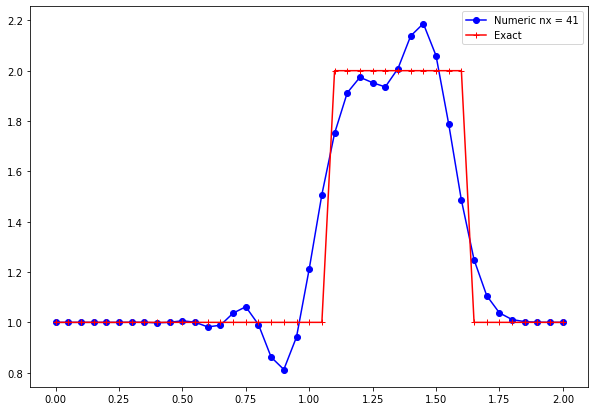

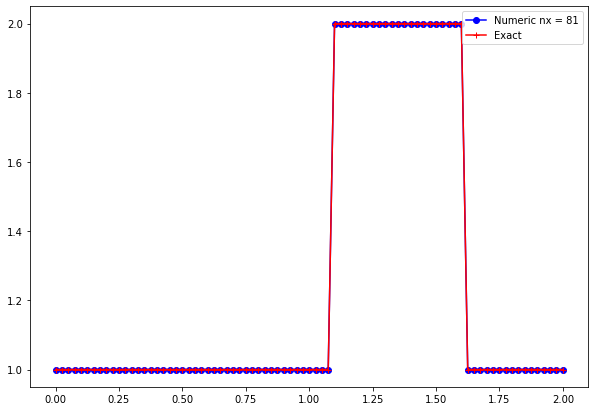

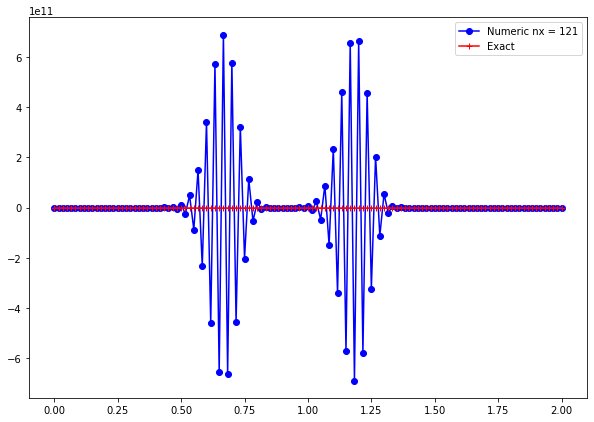

In [106]:
for nx in [41,81,121]:   
    MacCormack_graph(nx)

0. Какой у схемы порядок аппроксимации?

##################(Answer)##################

Данный метод имеет второй порядок аппроксимации $O(\Delta x^2, \Delta t^2)$. Данную выкладку взял отсюда (рассматриваем как двухшаговый метод Лакса-Вендроффа): https://kazedu.com/referat/201463

1. Удалось ли получить решение? Почему?

##################(Answer)##################

По аналогии с предыдущим заданием. Тут условие устойчивости следующее:
$$r = \frac{\tau}{h}\cdot |u| \leq 1$$
(Взято отсюда https://kazedu.com/referat/201463). Аналогично наблюдаем выполнение для $nx = 41,\; 81$. 

2. Почему при решении на 41 узле решение осциллирует, а на 81 узле нет?

##################(Answer)##################

Схож с предпоследним пунктом первого задания. Для $nx = 81$ опять получаем $r = 1$ (одинаковая групповая скорость), для $nx = 41$ опять эффект распространения с разными скоростями гармоник разных длин волн.


3. Объясните причину осцилляций.

##################(Answer)##################

Объяснил в пункте 2.

4. Совпадает ли схема со схемой Лакса-Вендроффа для данной задачи (Lax–Wendroff method)?

##################(Answer)##################

"Для линейного уравнения переноса схема МакКормака эквивалентна схеме Лакса— Вендроффа"

https://ftf.tsu.ru/wp-content/uploads/L.L.-Minkov-E.R.-SHrager-Osnovnye-podhody-k-chislennomu-resheniyu-odnomernyh-uravnenij-teploprovodnosti.pdf#page=34


#### Часть 3. Монотонная схема высокого порядка

1. Можно ли построить линейную монотонную по Годунову схему с порядком выше первого? Почему?

##################(Answer)##################

По Th Годунова не существует такой линейной монотонной по Годунову схемы. Источник википедия: https://translated.turbopages.org/proxy_u/en-ru.ru.73e42550-626219e0-07973535-74722d776562/https/en.wikipedia.org/wiki/Godunov%27s_theorem


2. Постройте монотонную схему порядка выше первого и примените к решению задачи из предыдущих частей.

##################(Answer)##################

Ответ представлен ниже.

Использовал задачу из задания, в которой нужно было получить разностную схему для такого уравнения. Её итоговая разностная схема имела порядок аппроксимации равен 2.
$$au_{l}^{n+1} +bu_{l-1}^{n} + du_{l}^{n} + fu_{l+1}^{n} = 0$$

Далее найдём саму разностную схему методом неопределённых коэффициентов. Вспомним исходное уравнение:
$$u_{t} + cu_{x} = 0$$

Получаем следующую систему (после всех необходимых разложений в ряд Тейлора и увеличения порядка аппроксимации путём использования условия $u_{tt} = c^2u_{xx}$):
$$\begin{cases}a = \frac{1}{\tau}\\ b = \frac{-c^2\tau - ch}{2h^2}\\ d = \frac{\tau^2 c^2 - h^2}{h^2 \tau}\\ f = \frac{ch - c^2 \tau}{2h^2};  \end{cases}$$

По итогу получалась такая схема
$$\frac{u_{l}^{n+1} - u_{l}^{n}}{\tau} + c\cdot \frac{u_{l+1}^{n} - u_{l-1}^{n}}{2h} + \tau c^2\cdot \frac{u_{l+1}^{n} - 2u_{l}^{n} + u_{l-1}^{n}}{2h^2} = 0$$

Она имеет второй порядок аппроксимации $O(\Delta x^2, \Delta t^2)$ 

Всё получено в номере 7.2 домашнего задания. Но также стоит учесть, что для построения алгоритма надо переписать исходную схему выразив оттуда $u_{l}^{n+1}$ (и в нашей задаче с = 1) $$u_{l}^{n+1} = \frac{-bu_{l-1}^{n} - du_{l}^{n} - fu_{l+1}^{n}}{a}$$

In [3]:
def Mine_graph(nx):
    dx = 2 / (nx-1) # шаг по пространству
    nt = 25    # количество узлов по времени
    dt = .025  # шаг по времени
    T = dt*(nt-1)
    c = 1      # скорость распространения возмущения (коэффициент переноса)
    x_mesh = np.linspace(0, 2, nx) #сетка по пространству
    u_init = np.ones(nx)  # Делаем размер на 1 больше т.к. теперь есть шаг по пространству вперёд    
    u_init[int(.5 / dx):int(1 / dx + 1)] = 2  
    u_exact = np.ones(nx)      
    u_exact[int((.5+c*T) / dx):int((1+c*T) / dx + 1)] = 2
    
    un = np.ones(nx) # инициализация вспомогательного массива для хранения
                 # данных с предыдущего шага
    u = u_init.copy()
    for n in range(1, nt):  
        un = u.copy() 
        # TODO: predictor
        for i in range(1, nx-1): # шагаем по пространству, меньше размер т.к. теперь нужно знать U(l+1)
            u[i] = (dt*dt + dx*dt)/(2*dx*dx)*un[i-1] +(dx*dx -dt*dt)/(dx*dx)*un[i] + (dt*dt - dx*dt)/(2*dx*dx)*un[i+1]

 
    plt.figure(figsize = (10, 7))
    plt.plot(x_mesh, u, '-bo', label = 'Numeric nx = ' + str(nx))
    plt.plot(x_mesh, u_exact, '-r+', label = 'Exact')
    plt.legend()
    plt.show()

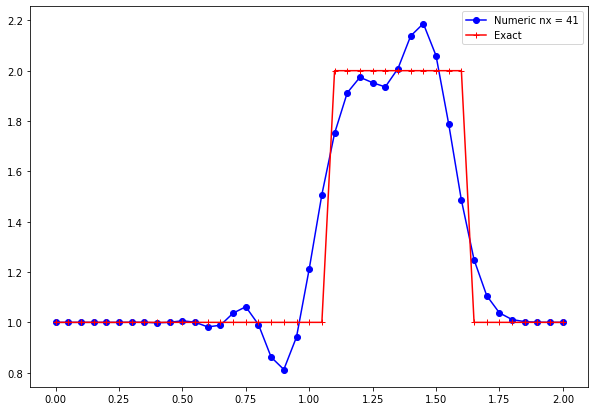

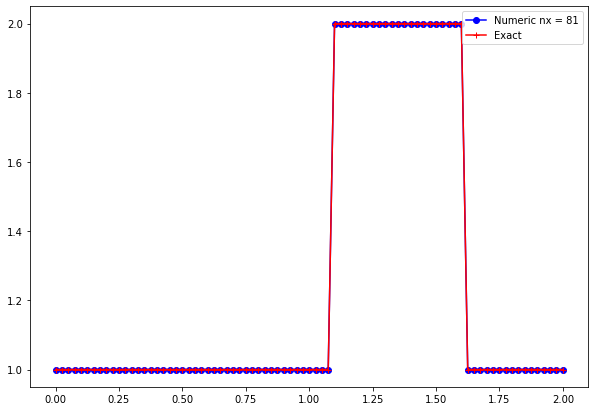

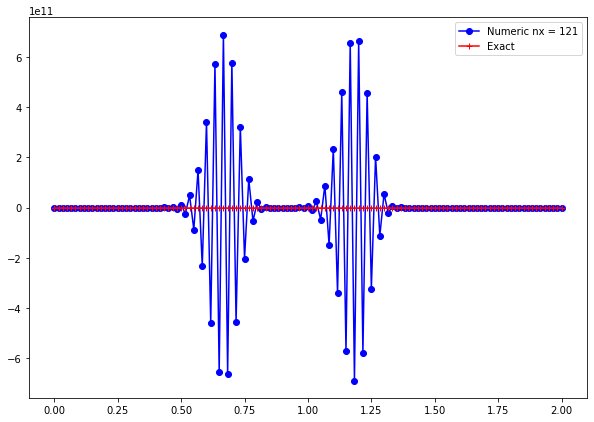

In [4]:
for nx in [41,81,121]:   
    Mine_graph(nx)